In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 
from sklearn.decomposition import PCA
from astropy.table import Table, Column
import sys
from sklearn import svm
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from astropy.table import Table, Column
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys
from scipy.stats import kde
from tqdm import tqdm
import pandas as pd
sys.path.insert(0, '../Modules')
import erqScaling
import erqMedSpec
import os
from statistics import random

sys.path.insert(0, '/home/reza/erq/')
# from erqml  import *
from sklearn.cluster import AgglomerativeClustering


In [2]:

# reading ...
smp=Table.read('../LumMatch/LumMatch.fits') 

iW3 = smp['i-w3']
# iW3 = 10.0**(iW3/2.5)
kt80 = smp['kurt80_gf']
rew = smp['rew_gf']
rew=np.log10(rew)
fwhm = smp['fwhm_gf'] 
fwhm=np.log10(fwhm)
N5_C4 = smp['frat_nv/civ']
rz=smp['r-z']
sdss_name=smp['sdss_name']
z_qso=smp['z_dr12']
X = np.array(list(zip(iW3, rew, kt80)))
# iW3_sc, m, s = scale(iW3)
# rew_sc, m, s = scale(rew)
# X_sc, minData, rangeData = erqScaling.MinMaxScaler(X)
X_sc, minData, rangeData = erqScaling.scale(X)


symbols = ['d', 'o', 's','x', 'v']
sizes=[10,1,7,7, 3]
# colors = plt.cm.viridis_r(X_sc[:,2])
colors = ['r', 'b', 'g', 'c','y']
# smp.columns
# print(len(colors))
# print(np.max(rz))/

5 average
224 [4.63325109 1.92755123 0.35132148]
15 [4.98836786 1.30735402 0.28299019]
10 [2.16324389 0.56209645 0.2180287 ]
28985 [2.48257264 1.55364002 0.24648162]
3 [7.48620275 1.67087237 0.2228177 ]


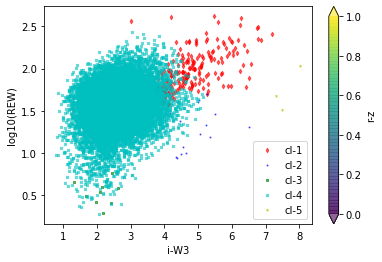

In [3]:
link='average'

for ncl in range(5,6):
    print(ncl, link)
    model = AgglomerativeClustering(n_clusters=ncl,
                                        linkage=link, affinity='euclidean').fit(X_sc)
    labels = model.labels_
    
    for i in range(ncl):
        X_plot = X[labels==i]
        print(len(X_plot), np.median(X_plot,axis=0))
        symbols_plot = symbols[i]
        colors_plot = colors[i]
        size_plot=sizes[i]
        p=plt.scatter(X_plot[:,0], X_plot[:,1],   
                    marker=symbols_plot, facecolor=colors_plot, 
                      alpha=0.6, s=size_plot, label='cl-%d'%(i+1))
    plt.colorbar(p, extend='both', label='r-z')
    plt.xlabel('i-W3')
    plt.ylabel('log10(REW)')
    plt.legend()
    plt.savefig('3d-rz-agg-l-%s-ncl-%d-cmp.pdf' %(link,ncl) , bbox_inches='tight', dpi=200)
    plt.show()

In [ ]:
# link='complete'
# from sklearn.model_selection import train_test_split
# nBoot=20
# BootLabels=np.zeros([nBoot,len(X_sc)])
# BootLabels=BootLabels-1
# ncl=5
# for b in (range(nBoot)):
#     print('Boot: ',b)
#     X_dummy, X_test = train_test_split(X_sc, test_size=0.9)
#     model = AgglomerativeClustering(n_clusters=ncl, linkage=link, 
#                                     affinity='euclidean').fit(X_test)
#     labels = model.labels_
#     for i in tqdm(range(len(X_sc))):
#         for j in range(len(X_test)):
    
#             if((X_sc[i,0]==X_test[j,0]) & (X_sc[i,1]==X_test[j,1]) & (X_sc[i,2]==X_test[j,2])):
#                 BootLabels[b,i]=labels[j]

29207 29237


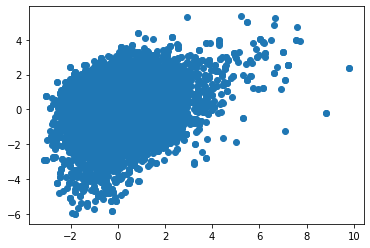

In [11]:
link='average'
from sklearn.model_selection import train_test_split
nBoot=5
BootLabels=np.zeros([nBoot,len(X_sc)])
data_range_x = np.linspace(np.min(X_sc[:,0]), np.max(X_sc[:,0]), len(X_sc))
data_range_y = np.linspace(np.min(X_sc[:,1]), np.max(X_sc[:,1]), len(X_sc))
data_range_z = np.linspace(np.min(X_sc[:,2]), np.max(X_sc[:,2]), len(X_sc))
nERQ = np.sum(((iW3>=4.6)&(rew>=2)))
BootSize=np.int32(len(X_sc)*0.999)
rand_ind = np.random.choice(range(len(X_sc)), BootSize)
X_test= X_sc[rand_ind,:]
plt.scatter(X_test[:,0], X_test[:,1])
print(BootSize, len(X_sc))

  0%|          | 0/5 [00:00<?, ?it/s]

Boot:  0
29138 [-0.12527826 -0.00738189 -0.04336997]
61 [5.67459198 3.23816969 1.82999118]
4 [1.87389424 5.16273137 0.43756647]
2 [9.778495   2.38550116 2.14943239]
2 [ 8.83357886 -0.23245077 -0.96124727]


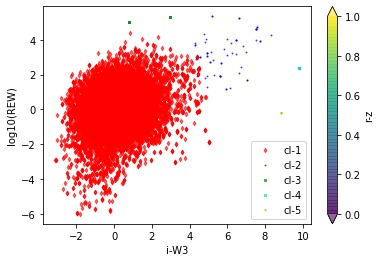

 20%|██        | 1/5 [00:49<03:19, 49.84s/it]

Boot:  1
28516 [-0.10211246  0.01317536 -0.06226431]
47 [5.89537693 3.26320267 1.94488943]
4 [ 8.67538773  0.58069194 -0.47278213]
1 [2.94236700e+00 5.28275775e+00 3.06389303e-03]
639 [-1.06067055 -2.76236639  2.14976233]


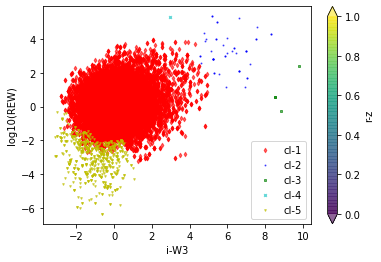

 40%|████      | 2/5 [01:45<02:34, 51.65s/it]

Boot:  2
29135 [-0.11333634 -0.00668034 -0.04720337]
3 [ 8.83357886 -0.23245077 -0.96124727]
4 [0.80542148 5.04270499 0.87206905]
64 [5.77372584 3.18732027 1.85503846]
1 [9.778495   2.38550116 2.14943239]


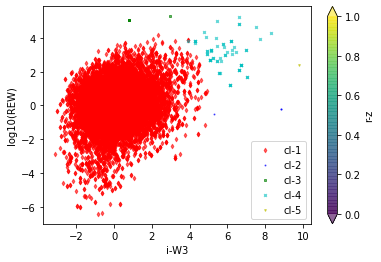

 60%|██████    | 3/5 [02:34<01:41, 50.94s/it]

Boot:  3
176 [4.15045224 2.04711948 1.92828162]
29 [-1.69177357 -5.38125733  2.14995972]
28996 [-0.11465685 -0.0118055  -0.04810501]
3 [ 8.83357886  0.58069194 -0.47278213]
3 [0.80542148 5.04270499 0.87206905]


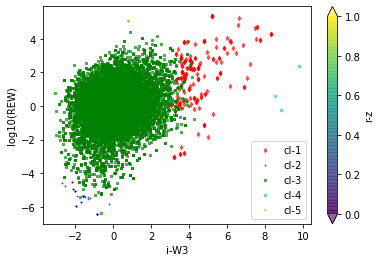

 80%|████████  | 4/5 [03:18<00:48, 48.64s/it]

Boot:  4
168 [4.04190338 1.93611285 1.57973315]
28765 [-0.12162097  0.0029629  -0.07313455]
4 [ 8.5171966   0.58069194 -0.47278213]
263 [-0.49672072 -3.71422363  2.15025294]
7 [6.83001829 3.93735452 0.42703556]


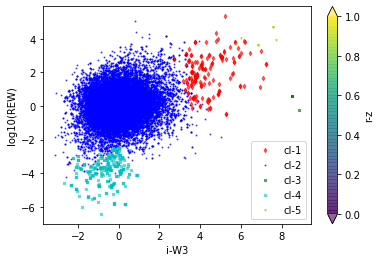

100%|██████████| 5/5 [04:13<00:00, 50.62s/it]


In [12]:
ncl=5
for b in tqdm(range(nBoot)):
    X_test=X_sc
    print('Boot: ',b)
    rand_ind = np.random.choice(range(len(X_sc)), BootSize)
    X_test= X_sc[rand_ind,:]
#     for r in range(BootSize):
#         X_test[rand_ind[r],0] = np.random.choice(data_range_x)
#         X_test[rand_ind[r],1] = np.random.choice(data_range_y)
#         X_test[rand_ind[r],2] = np.random.choice(data_range_z)
    model = AgglomerativeClustering(n_clusters=ncl, linkage=link, 
                                    affinity='euclidean').fit(X_test)
    labels = model.labels_
    for i in range(ncl):
        
        X_plot = X_test[labels==i]
        print(len(X_plot), np.median(X_plot,axis=0))
        symbols_plot = symbols[i]
        colors_plot = colors[i]
        size_plot=sizes[i]
        p=plt.scatter(X_plot[:,0], X_plot[:,1],   
                    marker=symbols_plot, facecolor=colors_plot, 
                      alpha=0.6, s=size_plot, label='cl-%d'%(i+1))
    plt.colorbar(p, extend='both', label='r-z')
    plt.xlabel('i-W3')
    plt.ylabel('log10(REW)')
    plt.legend()
#     plt.savefig('3d-agg-l-%s-ncl-%d-avg.pdf' %(link,ncl) , bbox_inches='tight', dpi=200)
    plt.show()
#     BootLabels[b,rand_ind]=labels
#     BootLabels[b,~rand_ind]=np.int32((b+1)*100)

In [ ]:
for b in tqdm(range(nBoot)):
    labels = BootLabels[b,:]
    for i in range(ncl):
        X_plot = X[labels==i]
        print(len(X_plot), np.median(X_plot,axis=0))
        symbols_plot = symbols[i]
        colors_plot = colors[i]
        size_plot=sizes[i]
        p=plt.scatter(X_plot[:,0], X_plot[:,1],   
                    marker=symbols_plot, facecolor=colors_plot, 
                      alpha=0.6, s=size_plot, label='cl-%d'%(i+1))
    plt.colorbar(p, extend='both', label='r-z')
    plt.xlabel('i-W3')
    plt.ylabel('log10(REW)')
    plt.legend()
#     plt.savefig('3d-agg-l-%s-ncl-%d-avg.pdf' %(link,ncl) , bbox_inches='tight', dpi=200)
    plt.show()

In [ ]:
Labels_with_CI=np.zeros([len(X_sc),2])
for i in range(len(X_sc)):
    L = np.int32(BootLabels[:,i])
    M = np.unique(L, return_counts=True)
    ind_mod =np.where(M[1]==np.max(M[1]))
    Mod = M[0][ind_mod[0][0]]
    CI_Mod = np.max(M[1])/nBoot
    Labels_with_CI[i,0]=Mod
    Labels_with_CI[i,1]=CI_Mod
    
np.savetxt('random-#1-Labels_with_CI.dat', Labels_with_CI)
np.savetxt('random-#1-BootLabels.dat', BootLabels, fmt='%d')

In [ ]:
label0= Labels_with_CI[:,0]==4
# np.median(Labels_with_CI[label0,1])
plt.hist(Labels_with_CI[label0,1])

In [ ]:
plt.scatter(Labels_with_CI[:,0],Labels_with_CI[:,1])

In [ ]:
from sklearn import metrics
metrics.silhouette_score(X_test, labels, metric='euclidean')

In [ ]:
metrics.calinski_harabasz_score(X_test, labels)

In [ ]:
metrics.davies_bouldin_score(X_test, labels)

In [ ]:
a=[1,2,3,4,5,6,7,8,9]

np.random.choice(a, 3)

In [ ]:
rand_ind = np.random.choices(range(len(X_sc)), k=int(len(X_sc)*0.1))


In [ ]:
c=np.array([1,2,3,4,5,6,7])
bb=[1,2]
# c==bb

In [ ]:
int(len(X_sc)*0.1)


In [ ]:
c[[2,3,5]]

In [ ]:
BootSize/5